# Project 4

In this project, you will summarize and present your analysis from Projects 1-3.

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
dummy_ranks = pd.get_dummies(df['prestige'],prefix="prestige")
df = df.join(pd.get_dummies(df['prestige'],prefix="prestige"))

In [46]:
df.head(10)



,admit,gre,gpa,prestige,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,3.0,0.0,0.0,1.0,0.0
1,1,660.0,3.67,3.0,0.0,0.0,1.0,0.0
2,1,800.0,4.00,1.0,1.0,0.0,0.0,0.0
3,1,640.0,3.19,4.0,0.0,0.0,0.0,1.0
4,0,520.0,2.93,4.0,0.0,0.0,0.0,1.0
5,1,760.0,3.00,2.0,0.0,1.0,0.0,0.0
6,1,560.0,2.98,1.0,1.0,0.0,0.0,0.0
7,0,400.0,3.08,2.0,0.0,1.0,0.0,0.0
8,1,540.0,3.39,3.0,0.0,0.0,1.0,0.0
9,0,700.0,3.92,2.0,0.0,1.0,0.0,0.0


### Intro: Write a problem Statement/ Specific Aim for this project

Answer: To determine how the variables affect admission rate

### Dataset:  Write up a description of your data and any cleaning that was completed

Answer: the data has 'gre', 'gpa' and 'prestige' as dependent variables and 'admit' as independent variable

In [ ]:
all the na values were dropped

In [ ]:
because 'prestige' is a categorical variable, dummies variables were created

### Demo: Provide a table that explains the data by admission status

Mean (STD) or counts by admission status for each variable 

| Not Admitted | Admitted
---| ---|---
GPA | mean(std)  | mean(std)
GRE |mean(std) | mean(std)
Prestige 1 | frequency (%) | frequency (%)
Prestige 2 | frequency (%) | frequency (%)
Prestige 3 |frequency (%) | frequency (%)
Prestige 4 |frequency (%) | frequency (%)

In [7]:
df.describe()

,admit,gre,gpa,prestige,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665,0.153652,0.372796,0.304786,0.168766
std,0.466044,115.717787,0.380208,0.947083,0.361070,0.484159,0.460898,0.375017
min,0.000000,220.000000,2.260000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,520.000000,3.130000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,580.000000,3.400000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,660.000000,3.670000,3.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,800.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
df[df['admit']==1].std()

admit             0.000000
gre             109.257233
gpa               0.371655
prestige          0.921455
prestige_1.0      0.441426
prestige_2.0      0.495632
prestige_3.0      0.417399
prestige_4.0      0.294715
dtype: float64

In [85]:
df[df['admit']==0].std()

admit             0.000000
gre             116.052798
gpa               0.376355
prestige          0.918922
prestige_1.0      0.304941
prestige_2.0      0.478026
prestige_3.0      0.475647
prestige_4.0      0.402941
admit_pred        0.221750
dtype: float64

In [87]:
pd.crosstab(index=df["prestige"], columns = df["admit"], margins = True) 

admit,0,1,All
prestige,,,
1.0,28,33,61
2.0,95,53,148
3.0,93,28,121
4.0,55,12,67
All,271,126,397


In [39]:
df_columns = df.drop('admit',axis = 1).columns.values
df_columns

array(['gre', 'gpa', 'prestige', 'prestige_1.0', 'prestige_2.0',
       'prestige_3.0', 'prestige_4.0'], dtype=object)

### Methods: Write up the methods used in your analysis

Answer:To attack the problem, I will use logistic regression

In [43]:
cols_to_keep = ['admit', 'gre', 'gpa']

data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])

In [44]:
from sklearn.linear_model import LogisticRegression

data['intercept'] = 1.0
train_cols = data.columns[1:]

logit = sm.Logit(data['admit'], data[train_cols])

fitted_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


In [45]:
print fitted_model.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Wed, 26 Oct 2016   Pseudo R-squ.:                 0.08166
Time:                        21:11:31   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa              0.7793      0.333      2.344      0.019         0.128     1.431
prestige_2.0    -0.6801      0.317     -2.14

In [58]:
from sklearn.model_selection import cross_val_score

cols_to_keep = ['gre', 'gpa']

X = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
y = df['admit']

lr = LogisticRegression()
lr_admission_score = cross_val_score(lr,X, y)

print lr_admission_score.mean()


0.702684742158


### Results: Write up your results

Answer:based on the summary, 'prestige' has an inverse relationship with 'admit', so the better rank college (1 rank > 2 rank > 3 rank > 4 rank)that the student attended, the higher chance that the student will likely to get admitted.

In [60]:
print np.exp(fitted_model.params)

gre             1.002221
gpa             2.180027
prestige_2.0    0.506548
prestige_3.0    0.262192
prestige_4.0    0.211525
intercept       0.020716
dtype: float64


In [ ]:
based on this odd ratio summary, 'gpa' has more weight than 'gre' since 1 unit increased in 'gpa' yields more than 100% chance of admission compared to  'gre'

In [ ]:
having 1 more unit of 'gre' doesnt really affect admission rate

In [ ]:
a student who went to ranked 2 school would have a 50% chance lower to get admitted compared to 1st rank school

### Visuals: Provide a table or visualization of these results

<img src='placeholder.png' height= 25% width= 25%>

<img src='placeholder.png' height= 25% width= 25%>

In [74]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [75]:
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


In [78]:
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
dummy_ranks = pd.get_dummies(combos['prestige'], prefix='prestige')
dummy_ranks.columns = ['prestige_1', 'prestige_2', 'prestige_3', 'prestige_4']

cols_to_keep = ['gre', 'gpa', 'prestige']
combos = combos[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])

In [79]:
combos['admit_pred'] = fitted_model.predict(combos)

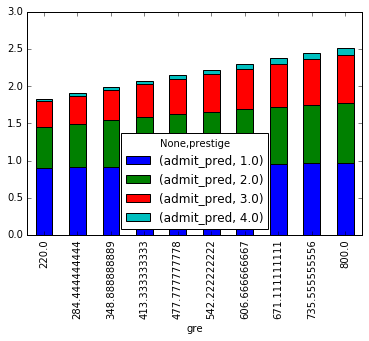

In [81]:
table = combos.pivot_table(index=["gre"],columns=["prestige"], values=["admit_pred"])
table.plot(kind="bar", stacked=True)

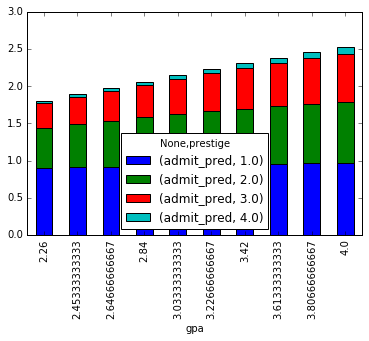

In [82]:
table = combos.pivot_table(index=["gpa"],columns=["prestige"], values=["admit_pred"])
table.plot(kind="bar", stacked=True)

### Discussion: Write up your discussion and future steps

Answer: evaluate model/ compare different ML models to see which one has the best result